In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

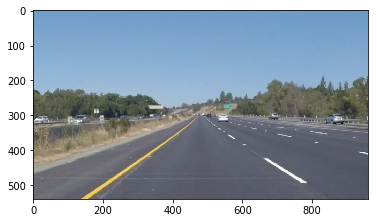

In [2]:
image = mpimg.imread('./test_images/solidYellowLeft.jpg')
plt.imshow(image)
plt.show()

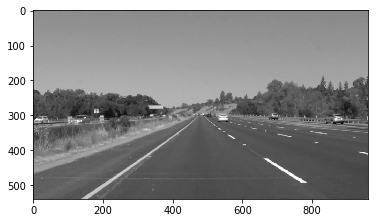

In [3]:
def grayscale(image):
    plt.imshow(gray,cmap='gray')
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

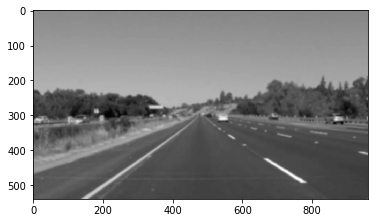

In [4]:
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
img = mpimg.imread('./test_images/solidYellowLeft.jpg')
img_blur = gaussian_blur(gray, 11)
plt.imshow(img_blur, cmap='gray');  

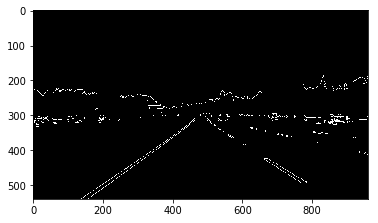

In [5]:
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)
img = mpimg.imread('./test_images/solidYellowLeft.jpg')
img_blur = gaussian_blur(gray, 3)
img_canny = canny(img_blur, 100, 255)
plt.imshow(img_canny, cmap='gray');
plt.show()

In [6]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255    
    cv2.fillPoly(mask, vertices, ignore_mask_color)

    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

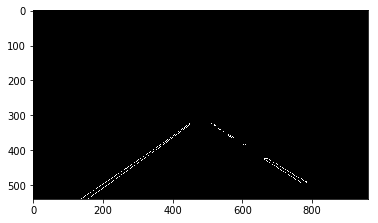

In [26]:
apex = [image.shape[1]/2, image.shape[0]/2]
trapezoid_ul = [img.shape[1]/2-40,(img.shape[0]/2)*1.2]
trapezoid_ur = [img.shape[1]/2+40,(img.shape[0]/2)*1.2]
trapezoid_lr = [img.shape[1],img.shape[0]]
trapezoid_ll = [0,img.shape[0]]

img = mpimg.imread('./test_images/solidYellowLeft.jpg')
img_gray = grayscale(img)
img_blur = gaussian_blur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)
img_masked = region_of_interest(img_canny, 
                                [np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])

ax[0].imshow(img_masked, cmap='gray');
ax[0].axis('on'); ax[1].axis('off');
plt.imshow(img_masked, cmap='gray')
plt.show()






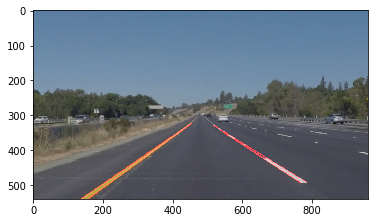

In [27]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    return cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
def draw_lines(img, lines, color=[255, 0, 0], thickness=2, extrapolate=True):
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if extrapolate:
        lm = []; lb = []
        rm = []; rb = [] 
        for line in lines:
            for x1,y1,x2,y2 in line:
                m = (y2-y1)/(x2-x1) 
                if (np.isfinite(m)) & (abs(m) < 1) & (abs(m) > 0.5):
                    b = y1 - m*x1 
                    if m < 0:
                        lm.append(m); lb.append(b)
                    else:
                        rm.append(m); rb.append(b)     
        if len(lm) > 0:
            _m = sum(lm)/len(lm)
            _b = sum(lb)/len(lb)
            l_p0 = (int((img.shape[0]-_b)/_m), img.shape[0])
            l_p1 = (int((img.shape[0]/2*1.2-_b)/_m), int(img.shape[0]/2*1.2))
            cv2.line(line_img, l_p0, l_p1, color, thickness)
        if len(rm) > 0:
            _m = sum(rm)/len(rm)
            _b = sum(rb)/len(rb)
            r_p0 = (int((img.shape[0]-_b)/_m), img.shape[0])
            r_p1 = (int((img.shape[0]/2*1.2-_b)/_m), int(img.shape[0]/2*1.2))
            cv2.line(line_img, r_p0, r_p1, color, thickness)
    else:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    α=0.8; β=1.; λ=0. 
    return cv2.addWeighted(img, α, line_img, β, λ)
image = mpimg.imread('./test_images/solidYellowLeft.jpg')
img_gray = grayscale(img)
img_blur = gaussian_blur(img_gray, 3)
img_canny = canny(img_blur, 100, 255)
img_masked = region_of_interest(img_canny, 
                                [np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])
lines = hough_lines(img = img_masked, rho = 2, theta = np.pi/120, threshold = 70, min_line_len = 100, max_line_gap = 100)
x = [trapezoid_ul[0], trapezoid_ur[0], trapezoid_lr[0], trapezoid_ll[0], trapezoid_ul[0]]
y = [trapezoid_ul[1], trapezoid_ur[1], trapezoid_lr[1], trapezoid_ll[1], trapezoid_ul[1]]
final = draw_lines(img, lines, extrapolate=False)
plt.imshow(final, cmap='gray')
plt.show()

In [28]:
import os
os.listdir("test_images/")

['solidYellowLeft.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve2.jpg',
 'solidWhiteCurve.jpg',
 'whiteCarLaneSwitch.jpg']

In [29]:
!pip install --upgrade pip

!pip install moviepy

!pip install imageio-ffmpeg

    100% |████████████████████████████████| 1.4MB 8.7MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1
     |████████████████████████████████| 22.2MB 3.1MB/s eta 0:00:01     |███████████████▉                | 11.0MB 3.1MB/s eta 0:00:04     |████████████████████▌           | 14.2MB 3.1MB/s eta 0:00:03


In [30]:
def get_roi(img):
    mask = np.zeros_like(img)   
    
    xsize = img.shape[1]
    ysize = img.shape[0]
    left_bottom = (80, ysize)
    left_top = (xsize / 2 - 50, ysize / 2 + 50)
    right_bottom = (xsize - 80, ysize)
    right_top = (xsize / 2 + 50, ysize / 2 + 50)
    vertices = np.array([[left_bottom, left_top, right_top, right_bottom]], dtype=np.int32)
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        cv2.line(img, (line[0][0], line[0][1]), (line[0][2], line[0][3]), color, thickness)
        
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

In [31]:
frames = os.listdir("test_images/")
from moviepy.editor import VideoFileClip
from IPython.display import HTML
def process_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_blur = gaussian_blur(img_gray, 3)
    img_canny = canny(img_blur, 100, 255)
    roi = get_roi(img)
    img_masked = region_of_interest(img_canny,[np.array([trapezoid_ll,trapezoid_ul,trapezoid_ur,trapezoid_lr],np.int32)])
    lines = hough_lines(img = img_masked, rho = 2, theta = np.pi/120, threshold = 70, min_line_len = 100, max_line_gap = 100)
    result = cv2.addWeighted(image, 0.8, lines, 1., 0.)
    return result 

In [32]:
white_output = 'test_videos_output/white.mp4'
clips = VideoFileClip("test_videos/solidWhiteRight.mp4")
line_clips = clips.fl_image(process_image) 
line_clips.write_videofile(white_output, audio=False)
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video test_videos_output/white.mp4
[MoviePy] Writing video test_videos_output/white.mp4


100%|█████████▉| 221/222 [00:13<00:00, 16.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/white.mp4 



In [20]:
yellow_output = 'test_videos_output/yellow.mp4'
clips = VideoFileClip("test_videos/solidYellowLeft.mp4")
line_clips = clips.fl_image(process_image) 
line_clips.write_videofile(yellow_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

[MoviePy] >>>> Building video test_videos_output/yellow.mp4
[MoviePy] Writing video test_videos_output/yellow.mp4


100%|█████████▉| 681/682 [00:44<00:00, 15.22it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/yellow.mp4 

